# Введение 

В этом конкурсе вы будете решать задачу из индустрии высокочастотного трейдинга (High-Frequency trading, HFT). Несмотря на наличие слова “трейдинг” в названии, это прежде всего высокотехнологичная индустрия, которая имеет довольно мало отношения к экономике: лидерство на рынке определяется скоростью и точностью работы инфраструктуры и торговых моделей. 

В рамках соревнования вам предстоит построить модель машинного обучения для предсказания краткосрочного изменения цены, то есть реализовать один из способов повышения эффективности торговой модели.

А чтобы работать с данными было еще интереснее, эксперты из команды HFT-фонда **Spectral:Technologies** подготовили краткий экскурс в ключевые концепты HFT и термины, необходимые для участия в соревновании.

# Биржа и ордербук

Упрощенно говоря, биржа --- это место, где торгуются различные *активы* (будь то фьючерсы на нефть, акции компаний, валютные пары и т.д.). По большому счету неважно, что представляет из себя конкретный актив – главное, что это некоторая сущность, у которой есть какая-то стоимость и которую можно купить или продать.

Для примера рассмотрим валютную пару EUR/USD. Допустим, у нас есть некоторое количество долларов, которое мы хотим обменять на евро. Мы можем прийти на биржу и сказать "я желаю купить 240 евро по цене 1.2 доллара за евро". Тем самым мы выставляем *лимитную заявку* (**limit order**) (в дальнейшем будет использоваться *ордер* вместо "заявки" как более распространенный в индустрии термин). Ордер называется лимитным, т.к. мы явно выставляем предел цены, по которой готовы купить актив. Количество актива, которое мы желаем продать или купить в ордере, называют *объемом*. 

Подобные ордера аналогично можно выставлять и на продажу актива. Множество лимитных ордеров на продажу и покупку называется *книгой заявок* или *биржевым стаканом*, или, что чаще распространено, **ордербуком**.

На картинке ниже показан ордербук, а также ордер из примера выше.


<img src="orderbook.jpg" width="600">


Ордера на покупку называются **биды** (bids), ордера на продажу называются **аски** (asks). Мнемонически можно запомнить, что **b**uy = **b**id. Расстояние между минимальным аском и максимальным бидом называется **спред** (spread).

Важно, что для ордербука в течение торгового периода справедливо ask > bid, и что биды в ордербуке расположены по убыванию цены, а аски по возрастанию.

Далее мы разберем, как именно на бирже заключаются *сделки*, т.е. непосредственно обмен. 


Помимо явного выставления цены ордера (т.е. постановки *лимитного ордера*), мы можем прийти на биржу и сказать "я хочу купить 300 евро по лучшей цене" – это будет так называемый *маркет ордер* (**market order**). В этом случае биржа берет лимитные ордера на продажу и начинает их *матчинг* с маркет-ордером на покупку. "По лучшей цене" для нас означает как можно дешевле, т.е. матчинг будет происходить в порядке возрастания цен асков. В приведенном примере мы сначала купим 200 евро по цене 1.22, а поскольку мы запросили 300, то еще 100 мы докупим по цене 1.23.

<img src="trade.jpg" width="600">


Таким образом, наш маркет-ордер будет исполнен, равно как и лимитные ордера, с которыми наш ордер заматчился. Лимитный ордер по цене 1.22 исполнен целиком, а по цене 1.23 --- частично. В итоге, в ордербуке останется лимитный ордер на продажу 300 евро по цене 1.23.

Исполненный лимитный ордер обычно называют *зафиленным* (от fill), а в результате успешного матчинга совершается *сделка* (**trade**). Соответственно, в данном примере было совершено две сделки.

Отметим, что, как правило, с каждой сделки биржа берет *комиссию* (**fee**), причем эта комиссия может быть разной для обоих участников сделки.


## Технические особенности

С технической точки зрения основная функция биржи --- проведение описанного матчинга *честно*. *Честно* в данном случае состоит из двух пунктов:

1. В правильном порядке с точки зрения цен (по возрастанию или убыванию в зависимости от стороны стакана).
2. В правильном порядке с точки зрения времени выставления лимитных ордеров.

Если два участника торговли поставили свои лимитные ордера в одну сторону стакана и на одну и ту же цену, матчиться сначала должен ордер, который был поставлен раньше.

Разные биржи предоставляют данные о торговле разной детализации. В рамках соревнования вы будете работать с так называемыми **L2-ордербуками**, в которых множество ордеров с одинаковой ценой агрегированы в одну строчку с суммарным объемом ордеров на этой цене (т.е. вы будете видеть "просуммированные" биды и аски, а не каждый бид и аск ордер в отдельности). 



# Высокочастотный трейдинг

Высокочастотная торговля (или HFT, от High Frequency Trading) характеризуется большим числом торговых операций (прежде всего, большой частотой выставлений и отмен лимитных ордеров). Обычно возможность HFT-стратегии зарабатывать зависит от способности максимально быстро реагировать на движения на рынке. Глобально же всегда есть tradeoff между сложностью стратегии (например, способностью предсказывать поведение рынка) и ее скоростью.

В HFT есть как минимум два ярко-выраженных вида торговли:

1. Арбитраж

В самом простом примере один и тот же актив может торговаться на разных биржах. Периодически возникают арбитражные возможности, когда можно купить его дешевле на одной бирже и продать дороже на другой. Прибыль тут сможет извлечь только тот, кто сделает это быстрее остальных.

2. *Маркет-мейкинг*

Заключается в предоставлении ликвидности бирже и является одной из ключевых функций HFT-компаний на рынке – о нем мы и поговорим подробнее.



## Market making

Любая биржа (как и участники торговли) заинтересована в том, чтобы рынок был как можно более *ликвидным*. Упрощенно говоря, на ликвидном рынке участники могут купить/продать актив по привлекательным для себя ценам достаточно быстро. Одним из признаков ликвидного рынка является маленький спред. При большом спреде лимитные ордера на покупку/продажу могут стоять в ордербуке достаточно долго без совершения каких-то сделок. Если же сделку необходимо совершить быстро, то кому-то необходимо пересечь этот большой спред (поставить ордер по невыгодной цене), что сулит финансовыми потерями.

*Маркет-мейкер* --- это участник рынка, который обязуется перед биржей предоставлять ликвидность в обмен на более выгодные условия торговли. 

Рассмотрим произвольную сделку. Одной из сторон этой сделки выступает *мейкер* (**maker**), т.е. тот, чей лимитный ордер стоял в стакане до совершения сделки. Другой стороной сделки является *тейкер* (**taker**), т.е. тот, чей маркет-ордер (или лимитный ордер, пересекший спред) привел к совершению сделки.

Можно сказать, что маркет-мейкер наполняет ордербук ордерами (*make* orderbook), предоставляя тем самым ликвидность, а тейкер эту ликвидность забирает. Именно поэтому биржи заинтересованы в привлечении маркет-мейкеров. 

Требований, которым должен удовлетворять маркет-мейкер, может быть много: так, *маркет-мейкер* должен гарантировать, что торгуемый им *мейкерский объем* будет составлять не менее x% от общего объема совершаемых сделок на бирже или, например, что спред не должен превышать указанную величину.  Поэтому маркет-мейкерами чаще всего являются крупные HFT-компании, и они обеспечивают основной объем торговли на рынках: по статистике более 80% сделок на фондовом рынке США совершаются именно при помощи торговых алгоритмов. 




## Дополнительные базовые понятия, которые будут полезны: 

Здесь и далее: P -- Price, V -- Volume, b -- Bid, a -- Ask. Кроме того, мы будем работать только с первыми уровнями ордербука (например, $P_a$ означает цену первого уровня аска).

Начнем с понятия *спред* -- как упоминалось выше, маленький спред является признаком ликвидного рынка. Спред на одном активе обычно почти константен: если спред *разошелся* (стал больше этой константы), стоит ожидать его *смыкания* (возвращения к этой константе).
$$S = P_a - P_b$$

*Мидпрайс* -- как понятно из описания ордербука, у актива нет никакой одной цены -- есть цена на покупку и цена на продажу (best bid и best ask). Для удобства часто ценой актива называют полусумму лучшего аска и лучшего бида:
$$P_{mid} =  \frac{P_a + P_b}{2}$$

*Return* -- величина, обозначающая разницу будущей (через окно $win$) и текущих цен: 
$$r_{now, win} = P_{now + win} - P_{now}$$ 

Проблема ретерна в том, что интуитивно понятно, что изменение цены на 10 долларов для акций стоимостью 100 и 1000 долларов -- совсем разные вещи. В связи с этим часто рассматривают *Log return*:$$lr_{now, win} = \log{\frac{P_{now+win}}{P_{now}}}$$



## На что стоит смотреть в данных: 

Один из наиболее важных факторов для предсказания будущего -- текущее состояние ордербука, в том числе его **имбаланс** (разница между сторонами ордербука). Это понятие не строгое и формализовать его можно разными способами. Один из наиболее известных -- **Weighted Average Price (WAP)**: $$WAP = \frac{𝑃_b𝑉_a+𝑃_a𝑉_b}{𝑉_a+𝑉_b}$$

Также стоит помнить, что цена -- это не одно число, а целый временной ряд, уходящий в прошлое. Это дает возможность смотреть на различные метрики, связанные с временем. Примером такой метрики может служить **Moving Average** -- средний midprice за некоторое окно: $$MA_t = \frac{\sum_{i=0}^t P_{now-i}}{t+1}$$

Также важной величиной является **волатильность** -- стандартное отклонение *ретернов*. Эта величина отражает, насколько интенсивно происходит движение актива, и в том числе помогает оценивать риски, связанные с его покупкой/продажей. Одним из ключевых свойств волатильности является ее **автокорреляция** -- то есть прошлая волатильность неплохо предсказывает будущую. Эту величину также можно формализовать различными способами, приведем пример одного из них:

$$Vol_{t} = \sqrt{\frac{\sum_{i=1}^{t} r^2_{now-i\cdot win, win}}{t}}$$

# Пример работы с данными


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numba import njit


df = pd.read_feather('train_competition.feather')
print('df.shape =', df.shape)
df.sample(5)


df.shape = (9209837, 122)


,timestamp,MIRAMAR_bid0_price,MIRAMAR_bid0_qty,MIRAMAR_bid1_price,MIRAMAR_bid1_qty,MIRAMAR_bid2_price,MIRAMAR_bid2_qty,MIRAMAR_bid3_price,MIRAMAR_bid3_qty,MIRAMAR_bid4_price,...,LIVIK_ask0_qty,LIVIK_ask1_price,LIVIK_ask1_qty,LIVIK_ask2_price,LIVIK_ask2_qty,LIVIK_ask3_price,LIVIK_ask3_qty,LIVIK_ask4_price,LIVIK_ask4_qty,target
5778154,1970-03-20 04:07:14.280042789,25938.0,1.0,25937.0,6.0,25936.0,2.0,25935.0,2.0,25934.0,...,10.0,17590.0,1.0,17591.0,2.0,17592.0,2.0,17593.0,2.0,1.0
5958800,1970-03-21 05:09:22.747333480,25853.0,1.0,25852.0,12.0,25851.0,29.0,25850.0,2.0,25848.0,...,1.0,17459.0,5.0,17460.0,6.0,17461.0,10.0,17462.0,7.0,-0.5
9045797,1970-05-04 00:37:36.174678386,25489.0,5.0,25488.0,2.0,25486.0,2.0,25485.0,3.0,25483.0,...,1.0,17091.0,1.0,17093.0,1.0,17099.0,2.0,17100.0,1.0,0.0
8590313,1970-04-30 00:57:22.782059047,26128.0,15.0,26125.0,1.0,26124.0,2.0,26122.0,1.0,26121.0,...,1.0,17439.0,1.0,17442.0,1.0,17444.0,2.0,17458.0,2.0,0.0
8077580,1970-04-23 04:44:08.831187501,25216.0,1.0,25215.0,5.0,25212.0,1.0,25211.0,2.0,25210.0,...,1.0,16897.0,1.0,16898.0,1.0,16899.0,1.0,16906.0,1.0,-0.5


В данных есть 122 столбца: timestamp, target и описания ордербуков по шести инструментам. Основной инструмент, который нас интересует -- SANHOK. Вашей задачей будет предсказать return его midprice за 1s. Остальные 5 инструментов высоко скоррелированы с SANHOK, поэтому могут помочь вам в предсказании.

Каждый ордербук задается 20 числами -- вам даны пять слоев ордербука в каждую сторону (bid и ask), и каждый из этих 10 слоев описывается двумя числами -- volume и price.

Данные отсортированы по timestamp.

Ниже приведена функция, которая отрисовывает случайное состояние ордербука для инструмента SANHOK. 

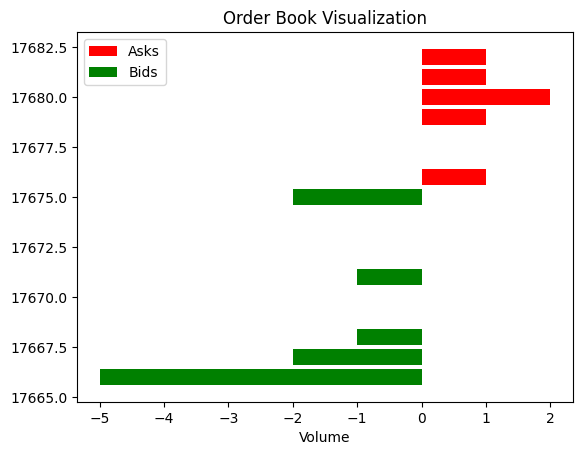

In [ ]:
def draw_random_orderbook(df, instrument='SANHOK'):
    ask_prices_columns = [column for column in df.columns if column.startswith(f'{instrument}_ask') and column.endswith('price')]
    bid_prices_columns = [column for column in df.columns if column.startswith(f'{instrument}_bid') and column.endswith('price')]
    ask_vol_columns = [column for column in df.columns if column.startswith(f'{instrument}_ask') and column.endswith('qty')]
    bid_vol_columns = [column for column in df.columns if column.startswith(f'{instrument}_bid') and column.endswith('qty')]
    random_id = np.random.randint(len(df))
    ask_prices = df.loc[random_id, ask_prices_columns].values
    bid_prices = df.loc[random_id, bid_prices_columns].values
    ask_volumes = df.loc[random_id, ask_vol_columns].values
    bid_volumes = df.loc[random_id, bid_vol_columns].values
    _, ax = plt.subplots()

    ax.barh(ask_prices, ask_volumes, color='red', label='Asks')
    
    ax.barh(bid_prices, -bid_volumes, color='green', label='Bids')

    ax.set_xlabel('Volume')
    ax.set_title('Order Book Visualization')

    ax.legend()
    plt.show()


draw_random_orderbook(df)

Приведем код, как считается целевая переменная:

In [ ]:
@njit
def get_future_price(ts, values, window):
    price_pointer = 0
    res = np.zeros(ts.size)
    for X_pointer in range(len(ts)):
        while price_pointer + 1 < len(ts) and ts[price_pointer] < ts[X_pointer] + window:
            price_pointer += 1
        res[X_pointer] = values[price_pointer]
    return res

In [ ]:
ts = ((df.timestamp - pd.to_datetime('1970-01-01')) // pd.Timedelta('1ns')).values
midprice = ((df.SANHOK_bid0_price + df.SANHOK_ask0_price) / 2).values
window = pd.Timedelta('1s') / pd.Timedelta('1ns')
future_price = get_future_price(ts, midprice, window)
assert all(df['target'] == future_price - midprice)


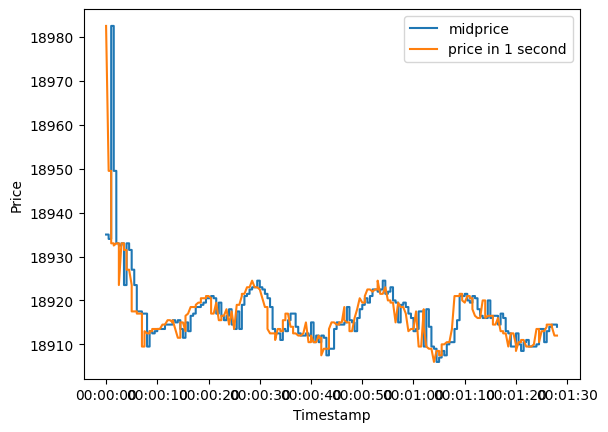

In [ ]:
n = 1000
_, ax = plt.subplots()
ax.plot(df.timestamp[:n], midprice[:n], label='midprice')
ax.plot(df.timestamp[:n], future_price[:n], label='price in 1 second')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Price')
ax.legend()
plt.show()


Сделаем пробное предсказание:

Обучим линейную модель.

r2_score =  0.02507344775186804


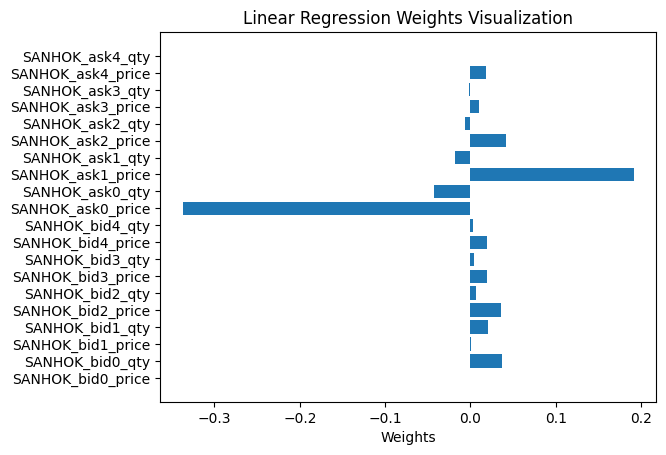

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression(fit_intercept=False)
SANHOK_columns = [column for column in df.columns if column.startswith('SANHOK')]
model.fit(df[SANHOK_columns], df['target'])

y_pred = model.predict(df[SANHOK_columns])
print('r2_score = ', r2_score(df['target'], y_pred))


_, ax = plt.subplots()
ax.barh(SANHOK_columns, model.coef_)

ax.set_xlabel('Weights')
ax.set_title('Linear Regression Weights Visualization')

plt.show()


Сделаем пробную посылку.

Посылка состоит из двух частей:
1. Вам нужно будет загрузить файл solution.py с функцией get_predict(df), которая будет использоваться для предсказания.
2. Вы можете загрузить любые файлы, которые нужны вам для вашего предсказания.


В нашем случае нам потребуется сохранить веса нашей линейной регрессии:

In [ ]:
np.save('coef.npy', model.coef_)

Файл solution.py в нашем случае будет выглядеть следующим образом:


In [ ]:
import numpy as np

def get_predict(df):
    lr_coef = np.load('coef.npy')
    SANHOK_columns = [column for column in df.columns if column.startswith('SANHOK')]
    y_pred = np.matmul(df[SANHOK_columns], lr_coef)
    return y_pred


Текущая посылка уже показывает скор 0.0266 на тестовых данных! Сможете ли вы улучшить этот результат?